In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [4]:
df.shape

(200, 5)

In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


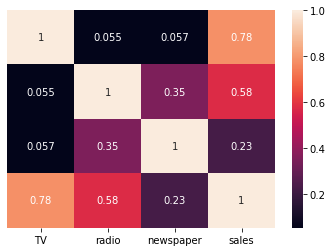

In [8]:
sns.heatmap(df.corr(),yticklabels=False,annot=True)

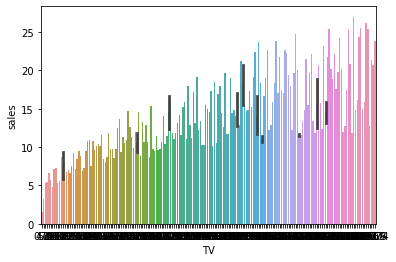

In [9]:
sns.barplot(x='TV',y="sales",data=df)

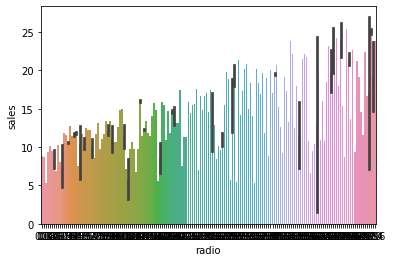

In [10]:
sns.barplot(x='radio',y="sales",data=df)

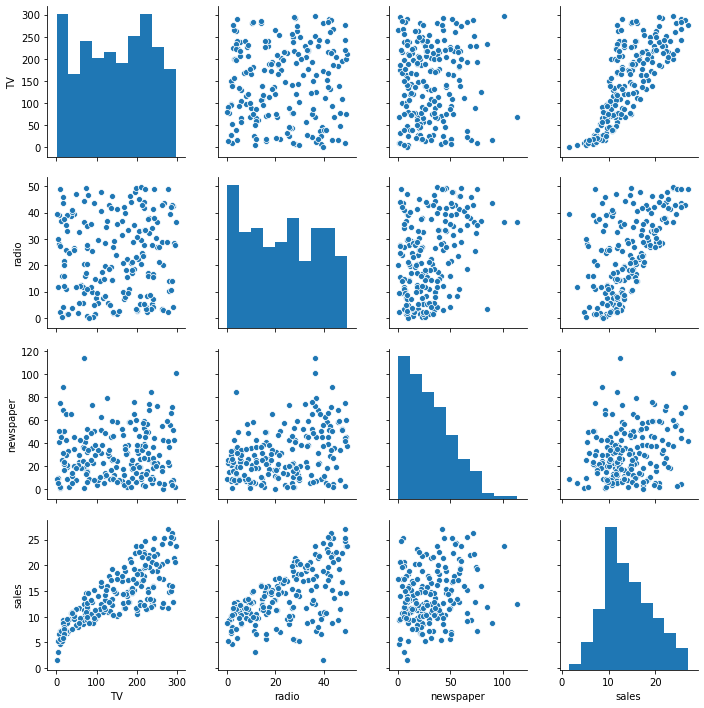

In [11]:
sns.pairplot(df)

In [12]:
from scipy.stats import zscore
zs=zscore(df)
df1=df.loc[(abs(zs)<3).all(axis=1)]
df.shape  ,  df1.shape

((200, 4), (198, 4))

In [13]:
df1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [14]:
import numpy as np
for index in df1.skew().index:
    if df1.skew().loc[index]>0.5:
        df1[index]=np.sqrt(df1[index])

C:\Users\vishwaraj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df1.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

In [21]:
x=df1.iloc[:,:-1]
x.head(2)

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653


In [23]:
y=df1[['sales']]
y.head(2)

,sales
0,22.1
1,10.4


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [29]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def r2score(regr,df_x,y):
    rs=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>rs:
            rs=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",rs)
    return final_r_state

In [30]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=r2score(lreg,x,y)

max r2 score corresponding to  90  is  0.9468304700964034


In [31]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())

Mean r2 score for Linear Regression:  0.8857406146589943


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [38]:
svr=SVR(kernel="rbf",C=10)
r_state=r2score(svr,x,y)

max r2 score corresponding to  63  is  0.9936632361984525


In [39]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for SVM Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").mean())

Mean r2 score for SVM Regression:  0.9754906234980829


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 63,test_size=0.20)
svr=SVR(kernel="rbf",C=10)
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.39540329448413436
r2_score is:  0.9936632361984525
